In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
global_temp_country = pd.read_csv('../input/global-climate-change/GlobalLandTemperaturesByCity.csv')


In [3]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


# Data Cleaning on global climate change data

In [4]:
global_temp_country.shape

(8599212, 7)

In [5]:
 global_temp_country.isna().sum()

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

In [6]:
global_temp_country.dropna(axis='index',how='any',subset=['AverageTemperature'],inplace=True)

In [7]:
global_temp_country.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [8]:
pd.set_option('display.max_rows',243)
global_temp_country.groupby(['Country'])['AverageTemperature'].mean()

Country
Afghanistan                           13.816497
Albania                               15.525828
Algeria                               17.763206
Angola                                21.759716
Argentina                             16.999216
Armenia                                8.375597
Australia                             16.701462
Austria                                6.285928
Azerbaijan                            11.113664
Bahamas                               24.786978
Bahrain                               25.855601
Bangladesh                            25.052512
Belarus                                6.142253
Belgium                                9.726197
Benin                                 26.975880
Bolivia                               11.352980
Bosnia And Herzegovina                10.449959
Botswana                              18.996498
Brazil                                21.902763
Bulgaria                              10.580413
Burkina Faso                    

In [9]:
global_temp_country['Country'].unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [10]:
dict={
    'Congo (Democratic Republic Of The)':'Congo'
}

In [11]:
global_temp_country['Country'].replace(dict,inplace=True)

# Let's Calculate average temperature for each country

In [12]:
avg_temp=global_temp_country.groupby(['Country'])['AverageTemperature'].mean().to_frame().reset_index()

In [13]:
avg_temp

,Country,AverageTemperature
0,Afghanistan,13.816497
1,Albania,15.525828
2,Algeria,17.763206
3,Angola,21.759716
4,Argentina,16.999216
5,Armenia,8.375597
6,Australia,16.701462
7,Austria,6.285928
8,Azerbaijan,11.113664
9,Bahamas,24.786978


In [14]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)

In [15]:
fig=px.choropleth(avg_temp,locations='Country',locationmode='country names',color='AverageTemperature')
fig.update_layout(title='Choropleth map of average temperature')
fig.show()

## The avaerage temperature and Horizontal Bar sort by countries

<AxesSubplot:xlabel='AverageTemperature', ylabel='Country'>

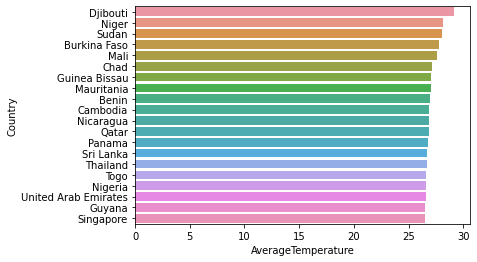

In [16]:
sns.barplot(x=avg_temp.sort_values(by='AverageTemperature',ascending=False)['AverageTemperature'][0:20],y=avg_temp.sort_values(by='AverageTemperature',ascending=False)['Country'][0:20])

# Is there global warming? 

In [17]:
global_temp=pd.read_csv('../input/global-climate-change/GlobalTemperatures.csv')

In [18]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
global_temp['dt'][0].split('-')[0]

'1750'

In [20]:
def fetch_year(date):
    return date.split('-')[0]

In [21]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [22]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [23]:
global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'})

,LandAverageTemperature,LandAverageTemperatureUncertainty
years,,
1750,8.719364,2.637818
1751,7.976143,2.781143
1752,5.779833,2.977000
1753,8.388083,3.176000
1754,8.469333,3.494250
...,...,...
2011,9.516000,0.082000
2012,9.507333,0.083417
2013,9.606500,0.097667


In [24]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [25]:
data['Uncertainty top']=data['LandAverageTemperature']+data['LandAverageTemperatureUncertainty']
data['Uncertainty bottom']=data['LandAverageTemperature']-data['LandAverageTemperatureUncertainty']

In [26]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainty top,Uncertainty bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [27]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainty top', 'Uncertainty bottom'],
      dtype='object')

In [28]:
import plotly.express as px

In [29]:
fig=px.line(data,x='years',y=['LandAverageTemperature',
       'Uncertainty top', 'Uncertainty bottom'],title='Average Land Tmeperature in World')
fig.show()

From the charts we can see, that there is global warming nowadays. The average temperature of Earth surface has the highest value in the last three centuries. The fastest temperature growth occurred in the last 30 years. This worries me, I hope soon humanity will fully switch to ecological sources of energy, that will reduce CO2. If it’s will not happened, we will be in disaster. This charts also have confidence intervals, which shows that measurement of temperature has become more accurate in the last few years.

# Analyse Average temperature in each season

In [30]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [31]:
global_temp.shape

(3192, 10)

In [32]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [33]:
global_temp['month']=global_temp['dt'].dt.month

In [34]:
global_temp.drop('dt',axis=1,inplace=True)

In [35]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


In [36]:
global_temp.dtypes

LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
years                                         object
month                                          int64
dtype: object

In [37]:
def get_season (month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [38]:
global_temp['season']=global_temp['month'].apply(get_season)

In [39]:
global_temp.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [40]:
years=global_temp['years'].unique()

In [41]:
years

array(['1750', '1751', '1752', '1753', '1754', '1755', '1756', '1757',
       '1758', '1759', '1760', '1761', '1762', '1763', '1764', '1765',
       '1766', '1767', '1768', '1769', '1770', '1771', '1772', '1773',
       '1774', '1775', '1776', '1777', '1778', '1779', '1780', '1781',
       '1782', '1783', '1784', '1785', '1786', '1787', '1788', '1789',
       '1790', '1791', '1792', '1793', '1794', '1795', '1796', '1797',
       '1798', '1799', '1800', '1801', '1802', '1803', '1804', '1805',
       '1806', '1807', '1808', '1809', '1810', '1811', '1812', '1813',
       '1814', '1815', '1816', '1817', '1818', '1819', '1820', '1821',
       '1822', '1823', '1824', '1825', '1826', '1827', '1828', '1829',
       '1830', '1831', '1832', '1833', '1834', '1835', '1836', '1837',
       '1838', '1839', '1840', '1841', '1842', '1843', '1844', '1845',
       '1846', '1847', '1848', '1849', '1850', '1851', '1852', '1853',
       '1854', '1855', '1856', '1857', '1858', '1859', '1860', '1861',
      

In [42]:
spring_temps=[]
summer_temps=[]
autumn_temps=[]
winter_temps=[]

In [43]:
for year in years:
    current_year=global_temp[global_temp['years']==year]
    spring_temps.append(current_year[current_year['season']=='spring']['LandAverageTemperature'].mean())
    summer_temps.append(current_year[current_year['season']=='summer']['LandAverageTemperature'].mean())
    autumn_temps.append(current_year[current_year['season']=='autumn']['LandAverageTemperature'].mean())
    winter_temps.append(current_year[current_year['season']=='winter']['LandAverageTemperature'].mean())

In [44]:
#Now let's make a dataframe on season
season=pd.DataFrame()
season['year']=years
season['spring_temp']=spring_temps
season['summer_temp']=summer_temps
season['autumn_temp']=autumn_temps
season['winter_temp']=winter_temps

In [45]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [46]:
season.columns

Index(['year', 'spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'], dtype='object')

In [47]:
fig=px.line(season,x='year',y=['spring_temp', 'summer_temp', 'autumn_temp', 'winter_temp'],title='Average temperature in Each season')
fig.show()

So, in this graph we can see that the world is getting warmer every year.

# Let's Analyse Trend in Temperature for the Top Economies

Let’s look at the chart of annual temperature changes in certain continents (we take into consideration one country per continent and mark Greenland as the coldest place on Earth).

In [48]:
continent = ['Russia', 'United States', 'China', 'Japan', 'Australia', 'India']

In [49]:
global_temp_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [50]:
global_temp_country[global_temp_country['Country'].isin(continent)]

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11925,1820-08-01,20.146,2.286,Ürümqi,China,44.20N,87.20E
11926,1820-09-01,15.331,1.775,Ürümqi,China,44.20N,87.20E
11927,1820-10-01,5.256,1.848,Ürümqi,China,44.20N,87.20E
11928,1820-11-01,-4.956,2.190,Ürümqi,China,44.20N,87.20E
11929,1820-12-01,-14.118,2.581,Ürümqi,China,44.20N,87.20E
...,...,...,...,...,...,...,...
8589599,2013-04-01,15.627,1.581,Zunyi,China,28.13N,106.36E
8589600,2013-05-01,19.473,0.227,Zunyi,China,28.13N,106.36E
8589601,2013-06-01,23.670,0.575,Zunyi,China,28.13N,106.36E
8589602,2013-07-01,26.159,0.713,Zunyi,China,28.13N,106.36E


In [51]:
continent_df=global_temp_country[global_temp_country['Country'].isin(continent)]

In [52]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
11925,1820-08-01,20.146,2.286,Ürümqi,China,44.20N,87.20E
11926,1820-09-01,15.331,1.775,Ürümqi,China,44.20N,87.20E
11927,1820-10-01,5.256,1.848,Ürümqi,China,44.20N,87.20E
11928,1820-11-01,-4.956,2.190,Ürümqi,China,44.20N,87.20E
11929,1820-12-01,-14.118,2.581,Ürümqi,China,44.20N,87.20E


In [53]:
continent_df.shape

(3274479, 7)

In [54]:
continent_df['years']=continent_df['dt'].apply(fetch_year)

In [55]:
continent_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,years
11925,1820-08-01,20.146,2.286,Ürümqi,China,44.20N,87.20E,1820
11926,1820-09-01,15.331,1.775,Ürümqi,China,44.20N,87.20E,1820
11927,1820-10-01,5.256,1.848,Ürümqi,China,44.20N,87.20E,1820
11928,1820-11-01,-4.956,2.190,Ürümqi,China,44.20N,87.20E,1820
11929,1820-12-01,-14.118,2.581,Ürümqi,China,44.20N,87.20E,1820


In [56]:
continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'})

AverageTemperature
years Country                          
1743  Russia                  -2.877295
      United States            5.818071
1744  Russia                   6.978618
      United States           13.858205
1745  Russia                  -6.259558
...                                 ...
2013  China                   14.962133
      India                   26.864186
      Japan                   14.640792
      Russia                   5.999847
      United States           16.381720

[1293 rows x 1 columns]

In [57]:
avg_temp=continent_df.groupby(['years','Country']).agg({'AverageTemperature':'mean'}).reset_index()
avg_temp.head(10)

,years,Country,AverageTemperature
0,1743,Russia,-2.877295
1,1743,United States,5.818071
2,1744,Russia,6.978618
3,1744,United States,13.858205
4,1745,Russia,-6.259558
5,1745,United States,4.039120
6,1750,Russia,4.992516
7,1750,United States,12.456202
8,1751,Russia,5.290917
9,1751,United States,13.140726


In [58]:
fig=px.line(avg_temp,x='years',y=['AverageTemperature'],color='Country',title='Average Land Temperature in World')
fig.show()

**Conclusion** ==>> we will see that there has been a global increase trend in temperature, particularly over the last 30 years. This is due to the violent activities of a humankind.

# Analyse Average Temperature of USA States

In [59]:
global_temp_state=pd.read_csv('../input/global-climate-change/GlobalLandTemperaturesByState.csv')

In [60]:
global_temp_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [61]:
filter=global_temp_state['Country']=='United States'
USA=global_temp_state[filter]

In [62]:
USA.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [63]:
USA=global_temp_state[global_temp_state['Country']=='United States']

In [64]:
USA.dropna(inplace=True)

In [65]:
USA['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [66]:
state={'Georgia (State)':'Georgia','District Of Columbia':'Columbia'}

In [67]:
USA['State'].replace(state,inplace=True)

In [68]:
USA=USA[['AverageTemperature','State']]

In [69]:
USA.head()

,AverageTemperature,State
7458,10.722,Alabama
7463,19.075,Alabama
7464,21.197,Alabama
7465,25.290,Alabama
7466,26.420,Alabama


In [70]:
USA_temp=USA.groupby('State')['AverageTemperature'].mean().reset_index()

In [71]:
USA_temp.head()

,State,AverageTemperature
0,Alabama,17.066138
1,Alaska,-4.890738
2,Arizona,15.381526
3,Arkansas,15.573963
4,California,14.327677


In [72]:
USA_temp.shape

(51, 2)

In [73]:
!pip install opencage

In [74]:
from opencage.geocoder import OpenCageGeocode

In [75]:
key = '5ca89e8267cb476a88cd247f5d0dc35d'
geocoder = OpenCageGeocode(key)
query = 'Bijuesca, Spain'  
results = geocoder.geocode(query)
print (results)

[{'annotations': {'DMS': {'lat': "41° 32' 25.83312'' N", 'lng': "1° 55' 13.28232'' W"}, 'MGRS': '30TWL9005499324', 'Maidenhead': 'IN91am99nr', 'Mercator': {'x': -213773.074, 'y': 5064053.763}, 'OSM': {'edit_url': 'https://www.openstreetmap.org/edit?relation=342295#map=16/41.54051/-1.92036', 'note_url': 'https://www.openstreetmap.org/note/new#map=16/41.54051/-1.92036&layers=N', 'url': 'https://www.openstreetmap.org/?mlat=41.54051&mlon=-1.92036#map=16/41.54051/-1.92036'}, 'UN_M49': {'regions': {'ES': '724', 'EUROPE': '150', 'SOUTHERN_EUROPE': '039', 'WORLD': '001'}, 'statistical_groupings': ['MEDC']}, 'callingcode': 34, 'currency': {'alternate_symbols': [], 'decimal_mark': ',', 'html_entity': '&#x20AC;', 'iso_code': 'EUR', 'iso_numeric': '978', 'name': 'Euro', 'smallest_denomination': 1, 'subunit': 'Cent', 'subunit_to_unit': 100, 'symbol': '€', 'symbol_first': 0, 'thousands_separator': '.'}, 'flag': '🇪🇸', 'geohash': 'ezqsk61xh2nts1rzhnmu', 'qibla': 106.81, 'roadinfo': {'drive_on': 'right

In [76]:
lat = results[0]['geometry']['lat']
lon = results[0]['geometry']['lng']
print (lat, lon)

41.5405092 -1.9203562


In [77]:
list_lat=[]
list_long=[]
for state in USA_temp['State']:
    results=geocoder.geocode(state)
    lat = results[0]['geometry']['lat']
    lon = results[0]['geometry']['lng']
    
    list_lat.append(lat)
    list_long.append(lon)

In [78]:
USA_temp['lat']=list_lat
USA_temp['lon']=list_long

In [79]:
USA_temp.head()

,State,AverageTemperature,lat,lon
0,Alabama,17.066138,33.258882,-86.829534
1,Alaska,-4.890738,64.445961,-149.680909
2,Arizona,15.381526,34.395342,-111.763275
3,Arkansas,15.573963,35.204888,-92.447911
4,California,14.327677,36.701463,-118.755997


In [80]:
import folium
from folium.plugins import HeatMap
basemap=folium.Map()

In [81]:
HeatMap(USA_temp[['lat','lon','AverageTemperature']]).add_to(basemap)
basemap

# Analyse on Average Temperature of Major Cities in India By Month

In [82]:
cities=pd.read_csv('../input/global-climate-change/GlobalLandTemperaturesByCity.csv')

In [83]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [84]:
cities.shape

(8599212, 7)

In [85]:
India=cities[cities['Country']=='India']

In [86]:
India.shape

(1014906, 7)

In [87]:
India['City'].unique()

array(['Abohar', 'Achalpur', 'Adilabad', 'Adoni', 'Agartala', 'Agra',
       'Ahmadabad', 'Ahmadnagar', 'Aizawl', 'Ajmer', 'Akola', 'Alandur',
       'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar', 'Ambala',
       'Ambarnath', 'Ambattur', 'Ambur', 'Amravati', 'Amritsar', 'Amroha',
       'Anand', 'Anantapur', 'Ara', 'Asansol', 'Aurangabad', 'Avadi',
       'Azamgarh', 'Badlapur', 'Bagaha', 'Bahadurgarh', 'Baharampur',
       'Bahraich', 'Baidyabati', 'Baleshwar', 'Ballia', 'Bally',
       'Balurghat', 'Banda', 'Bangalore', 'Bangaon', 'Bankura',
       'Bansbaria', 'Barakpur', 'Baranagar', 'Barasat', 'Barddhaman',
       'Bareli', 'Baripada', 'Barnala', 'Barsi', 'Basirhat', 'Basti',
       'Batala', 'Beawar', 'Begusarai', 'Belgaum', 'Bellary', 'Bettiah',
       'Bhadravati', 'Bhadreswar', 'Bhagalpur', 'Bharatpur', 'Bharuch',
       'Bhatpara', 'Bhavnagar', 'Bhilai', 'Bhilwara', 'Bhimavaram',
       'Bhind', 'Bhiwandi', 'Bhiwani', 'Bhopal', 'Bhubaneswar', 'Bhuj',
       'Bhusawal', 'Bid',

In [88]:
Cities=['New Delhi','Bangalore','Hyderabad','Pune','Madras','Calcutta','Gurgaon']

In [89]:
cities=India[India['City'].isin(Cities)]

In [90]:
cities.shape

(18291, 7)

In [91]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05N,77.26E
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05N,77.26E
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05N,77.26E
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05N,77.26E
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05N,77.26E


In [92]:
## Remove N&E frome Longitude and Latitude
cities['Latitude']=cities['Latitude'].str.strip('N')
cities['Longitude']=cities['Longitude'].str.strip('E')

In [93]:
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
630113,1796-01-01,22.672,2.317,Bangalore,India,12.05,77.26
630114,1796-02-01,24.420,1.419,Bangalore,India,12.05,77.26
630115,1796-03-01,26.092,2.459,Bangalore,India,12.05,77.26
630116,1796-04-01,27.687,1.746,Bangalore,India,12.05,77.26
630117,1796-05-01,27.619,1.277,Bangalore,India,12.05,77.26


In [94]:
cities['dt']=pd.to_datetime(cities['dt'])

In [95]:
cities['Month']=cities['dt'].dt.month
cities.drop('dt',axis=1,inplace=True)

In [96]:
cities.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Month
630113,22.672,2.317,Bangalore,India,12.05,77.26,1
630114,24.420,1.419,Bangalore,India,12.05,77.26,2
630115,26.092,2.459,Bangalore,India,12.05,77.26,3
630116,27.687,1.746,Bangalore,India,12.05,77.26,4
630117,27.619,1.277,Bangalore,India,12.05,77.26,5


In [97]:
cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame()

AverageTemperature
Month City                         
1     Bangalore           22.713981
      Calcutta            18.534335
      Gurgaon             14.238560
      Hyderabad           22.758290
      Madras              24.346733
      New Delhi           14.238560
      Pune                20.448205
2     Bangalore           24.656619
      Calcutta            21.503986
      Gurgaon             17.144980
      Hyderabad           25.317076
      Madras              25.831405
      New Delhi           17.144980
      Pune                22.607924
3     Bangalore           27.062186
      Calcutta            26.596807
      Gurgaon             23.014804
      Hyderabad           28.803543
      Madras              28.114448
      New Delhi           23.014804
      Pune                26.287686
4     Bangalore           27.988517
      Calcutta            29.847134
      Gurgaon             29.004576
      Hyderabad           31.465565
      Madras              30.441304
      New Delhi           29.004576
      Pune                29.004401
5     Bangalore           27.522754
      Calcutta            30.586287
      Gurgaon             33.297051
      Hyderabad           32.702005
      Madras              32.581952
      New Delhi           33.297051
      Pune                29.838203
6     Bangalore           25.468799
      Calcutta            29.920981
      Gurgaon             33.866005
      Hyderabad           29.968469
      Madras              32.142383
      New Delhi           33.866005
      Pune                27.220029
7     Bangalore           24.400481
      Calcutta            28.995377
      Gurgaon             31.174114
      Hyderabad           27.216586
      Madras              30.658619
      New Delhi           31.174114
      Pune                24.724738
8     Bangalore           24.362910
      Calcutta            28.809151
      Gurgaon             29.752423
      Hyderabad           26.573533
      Madras              29.977352
      New Delhi           29.752423
      Pune                24.197833
9     Bangalore           24.495115
      Calcutta            28.594123
      Gurgaon             28.994465
      Hyderabad           26.640239
      Madras              29.397029
      New Delhi           28.994465
      Pune                24.565742
10    Bangalore           24.091785
      Calcutta            26.874408
      Gurgaon             25.866375
      Hyderabad           25.679622
      Madras              27.741679
      New Delhi           25.866375
      Pune                24.367426
11    Bangalore           23.265158
      Calcutta            23.160976
      Gurgaon             20.346510
      Hyderabad           23.508134
      Madras              25.666679
      New Delhi           20.346510
      Pune                22.313670
12    Bangalore           22.290856
      Calcutta            19.156114
      Gurgaon             15.378814
      Hyderabad           21.892538
      Madras              24.168721
      New Delhi           15.378814
      Pune                20.253654

In [98]:
cities_temp=cities.groupby(['Month','City'])['AverageTemperature'].mean().to_frame().reset_index()

In [99]:
cities_temp.head()

,Month,City,AverageTemperature
0,1,Bangalore,22.713981
1,1,Calcutta,18.534335
2,1,Gurgaon,14.238560
3,1,Hyderabad,22.758290
4,1,Madras,24.346733


In [100]:
cities_temp.columns=['month','City','Mean_temp']
cities_temp.head()

,month,City,Mean_temp
0,1,Bangalore,22.713981
1,1,Calcutta,18.534335
2,1,Gurgaon,14.238560
3,1,Hyderabad,22.758290
4,1,Madras,24.346733


In [101]:
df=cities_temp.merge(cities,on='City',how='left')
df.head()

,month,City,Mean_temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bangalore,22.713981,22.672,2.317,India,12.05,77.26,1
1,1,Bangalore,22.713981,24.420,1.419,India,12.05,77.26,2
2,1,Bangalore,22.713981,26.092,2.459,India,12.05,77.26,3
3,1,Bangalore,22.713981,27.687,1.746,India,12.05,77.26,4
4,1,Bangalore,22.713981,27.619,1.277,India,12.05,77.26,5


In [102]:
data=df.drop_duplicates(subset=['month','City'])

In [103]:
data.head()

,month,City,Mean_temp,AverageTemperature,AverageTemperatureUncertainty,Country,Latitude,Longitude,Month
0,1,Bangalore,22.713981,22.672,2.317,India,12.05,77.26,1
2613,1,Calcutta,18.534335,18.708,2.305,India,23.31,88.25,1
5226,1,Gurgaon,14.238560,14.590,2.374,India,28.13,77.27,1
7839,1,Hyderabad,22.758290,22.759,2.322,India,16.87,78.70,1
10452,1,Madras,24.346733,24.252,2.433,India,13.66,80.09,1


In [104]:
data2=data[['month','City','Mean_temp','Country','Latitude','Longitude']]

In [105]:
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bangalore,22.713981,India,12.05,77.26
2613,1,Calcutta,18.534335,India,23.31,88.25
5226,1,Gurgaon,14.238560,India,28.13,77.27
7839,1,Hyderabad,22.758290,India,16.87,78.70
10452,1,Madras,24.346733,India,13.66,80.09


In [106]:
trace = go.Heatmap(z=data2['Mean_temp'],
                   x=data2['month'],
                   y=data2['City'])

In [107]:
data=[trace]
layout = go.Layout(
    title='Average Temperature Of Major Cities By Month in India',
)

In [108]:
fig = go.Figure(data=data, layout=layout)
fig.show()

# Let's try to visualise temperature on a Map

In [109]:
data2.head()

,month,City,Mean_temp,Country,Latitude,Longitude
0,1,Bangalore,22.713981,India,12.05,77.26
2613,1,Calcutta,18.534335,India,23.31,88.25
5226,1,Gurgaon,14.238560,India,28.13,77.27
7839,1,Hyderabad,22.758290,India,16.87,78.70
10452,1,Madras,24.346733,India,13.66,80.09


In [110]:
data2.shape

(84, 6)

In [111]:
import folium
m = folium.Map(title='Openstreetmap',zoom_start=2)

In [112]:
# Add points to the map
for id,row in data2.iterrows():
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Mean_temp']).add_to(m)

# Display the map
m

In the above, this map showing locations of major cities which tempature is increased every year through collected data from dataset. So, if we want to save our world we have to take proper step. The causes of climate change are: Humanity's increased use of fossil fuels – such as coal, oil and gas to generate electricity, run cars and other forms of transport, and power manufacturing and industry. Deforestation – because living trees absorb and store carbon dioxide.improvements to energy efficiency and vehicle fuel economy, increases in wind and solar power, biofuels from organic waste, setting a price on carbon, and protecting forests are all potent ways to reduce the amount of carbon dioxide and other gases trapping heat on the planet.on that way we can save our planet slowly from climate change.

# Thanks to ALL